In [1]:
import pandas as pd
import pickle
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
import re
import numpy as np
import multiprocessing 
from multiprocessing import Pool

[nltk_data] Downloading package punkt to /home/dval/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
with open('kp_tweets.pickle', "rb") as f:
    tweets = pickle.load(f)

In [33]:
#Extract hashtags from KP tweets and clean them and save new dataframe
tweets["hashtags"] = tweets.text.apply(lambda x: re.findall(r"#(\w+)", x))
tweets["hashtags"] = tweets.hashtags.apply(lambda x:', '.join(x))
tweets["hashtags"] = tweets["hashtags"].str.lower()
tweets["hashtags"] = tweets.hashtags.replace(r'^\s*$', np.nan, regex=True)
with open("kp_tweets_plus_hashtags.pickle", "wb") as f:
    pickle.dump(tweets, f)

In [42]:
#Prepare hashtags for plotting frequency analysis
hashtags = tweets.dropna()
hashtags = hashtags.set_index("created_at")

In [81]:
#Define a Function to count hashtag frequency
def hashtags_only(data):
    return pd.Series(data["hashtags"].str.split(', ').sum()).value_counts()

In [87]:
#Define function to use multi-core processing on hashtag counting
def parallelize_dataframe(df, func, n_cores=30):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [88]:
#Use multi-core processing to count hashtags
hashtag_frequencies = parallelize_dataframe(hashtags, hashtags_only)

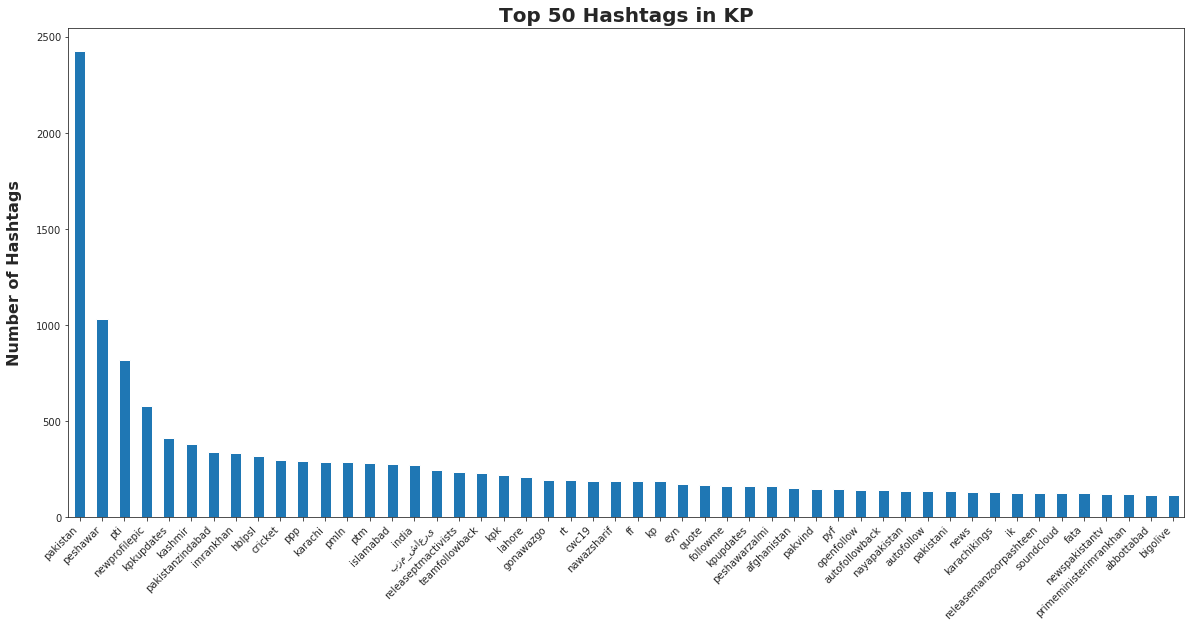

In [98]:
#Plot hashtags frequencies

to_plot = pd.DataFrame(hashtag_frequencies.head(50))
with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=to_plot
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Number of Hashtags',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=14, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Top 50 Hashtags in KP", fontweight="bold", fontsize=20)
    ax.get_legend().remove()
    
plt.savefig("Top 50 Hashtags KP.pdf", dpi=300, bbox_inches ="tight", transparent = True)